# i. Import Libraries
> *Cell* pertama pada *notebook* harus berisi dan hanya berisi semua library yang digunakan dalam project.



In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from feature_engine.outliers import Winsorizer
from scipy import stats
from tabulate import tabulate

import tensorflow as tf
import scikeras
from scikeras import wrappers
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input, concatenate

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score

import joblib

# ii. Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

## Memasukkan CSV

In [5]:
df_ori = pd.read_csv("Customer Churn.csv") 
data = df_ori.copy()
data

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


## Penjelasan Kolom

| Column | Description |
| :---: | --- |
| `user_id` | ID of a customer |
| `age` | Age of a customer |
| `gender` | Gender of a customer |
| `region_category` | Region that a customer belongs to |
| `membership_category` | Category of the membership that a customer is using |
| `joining_date` | Date when a customer became a member |
| `joined_through referral` | Whether a customer joined using any referral code or ID |
| `preferred_offer types` | Type of offer that a customer prefers |
| `medium_of operation` | Medium of operation that a customer uses for transactions |
| `internet_option` | Type of internet service a customer uses |
| `last_visit_time` | The last time a customer visited the website |
| `days_since_last_login` | Number of days since a customer last logged into the website |
| `avg_time_spent` | Average time spent by a customer on the website |
| `avg_transaction_value` | Average transaction value of a customer |
| `avg_frequency_login_days` | Number of times a customer has logged in to the website |
| `points_in_wallet` | Points awarded to a customer on each transaction |
| `used_special_discount` | Whether a customer uses special discounts offered |
| `offer_application_preference` | Whether a customer prefers offers |
| `past_complaint` | Whether a customer has raised any complaints |
| `complaint_status` | Whether the complaints raised by a customer was resolved |
| `feedback` | Feedback provided by a customer |
| `churn_risk_score` | Churn score <br><br> `0` : Not churn <br> `1` : Churn |

## Mengecek ukuran dataset

In [6]:
print (f'Dataset berjumlah {data.shape[0]} baris dan {data.shape[1]} kolom')

Dataset berjumlah 37010 baris dan 22 kolom


## Mengubah data gender

In [7]:
data['gender'] = data['gender'].map({'F': 'Female', 'M': 'Male'})

## Melihat 10 data teratas

In [8]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
user_id,9f420209e7d129f3,ac6e97806267549e,a6aa19b1580eed4e,aeee343277211c2f,82448b5c8ce6390c,96fbb6f63244b1f4,a52bc51378ecb057,94f338d20bf0f2b2,85c7996b17862e57,8a1625846d7a198b
age,29,50,26,63,64,35,43,15,49,35
gender,Female,Male,Female,Female,Male,Male,Male,Male,Male,Female
region_category,NaN,NaN,City,Village,Town,Town,NaN,City,Town,Town
membership_category,No Membership,Basic Membership,Silver Membership,No Membership,Silver Membership,Premium Membership,Gold Membership,No Membership,Platinum Membership,Basic Membership
joining_date,2017-04-05,2017-03-31,2017-02-11,2015-12-23,2015-03-20,2016-08-16,2017-03-09,2016-09-11,2017-04-24,2016-12-01
joined_through_referral,Yes,Yes,NaN,No,NaN,No,Yes,No,Yes,Yes
preferred_offer_types,Without Offers,Without Offers,Credit/Debit Card Offers,Credit/Debit Card Offers,Gift Vouchers/Coupons,Credit/Debit Card Offers,Gift Vouchers/Coupons,Credit/Debit Card Offers,Without Offers,Credit/Debit Card Offers
medium_of_operation,NaN,Desktop,NaN,Desktop,Smartphone,NaN,Smartphone,Smartphone,NaN,Desktop
internet_option,Wi-Fi,Fiber_Optic,Fiber_Optic,Fiber_Optic,Wi-Fi,Wi-Fi,Mobile_Data,Wi-Fi,Fiber_Optic,Mobile_Data


## Melihat 10 data terbawah

In [9]:
data.tail(10).T

,37000,37001,37002,37003,37004,37005,37006,37007,37008,37009
user_id,8a0fff47b7846031,8832eec42dc0e347,b9d9761f4d367c7a,a38816e7522f5f7b,8968d0458164dda9,924e9c06f0c73817,90e22286ac0acf04,9329a6297407334a,a4403ddda8fcf9f3,93b5d0330d24fa15
age,25,38,49,42,19,36,27,20,38,36
gender,Female,Male,Female,Female,Female,Male,Female,Male,Female,Male
region_category,Town,Town,City,Town,Town,Town,City,NaN,City,Town
membership_category,No Membership,Silver Membership,No Membership,Basic Membership,Gold Membership,Gold Membership,Gold Membership,Gold Membership,Gold Membership,Gold Membership
joining_date,2017-01-20,2016-09-19,2017-12-12,2017-07-05,2016-07-17,2015-03-05,2017-01-15,2015-07-11,2016-05-25,2016-10-18
joined_through_referral,No,NaN,NaN,Yes,Yes,NaN,Yes,Yes,Yes,NaN
preferred_offer_types,Gift Vouchers/Coupons,Credit/Debit Card Offers,Without Offers,Gift Vouchers/Coupons,Without Offers,Credit/Debit Card Offers,Without Offers,Without Offers,Without Offers,Without Offers
medium_of_operation,Smartphone,Smartphone,Both,Both,Smartphone,NaN,Desktop,NaN,Desktop,Both
internet_option,Wi-Fi,Wi-Fi,Wi-Fi,Wi-Fi,Fiber_Optic,Fiber_Optic,Wi-Fi,Mobile_Data,Wi-Fi,Fiber_Optic


## Melihat data statistik

In [10]:
data.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


## Melihat tipe data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

## Mengubah tipe `joining_date`

In [12]:
# Dari object ke datetime

data['joining_date'] = pd.to_datetime(data['joining_date'])

print(f"Tipe data dari 'joining_date' adalah {data['joining_date'].dtypes}")

Tipe data dari 'joining_date' adalah datetime64[ns]


# iii. Exploratory Data Analysis (EDA)
> Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Membagi churn rate
> Memisahkan antara data churn rate 1 dan 0

In [13]:
kolom = ['user_id', 'age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score']

data_churn         = data[data['churn_risk_score'] == 1][kolom]
data_tidak_churn   = data[data['churn_risk_score'] == 0][kolom]

## Melihat persebaran umur

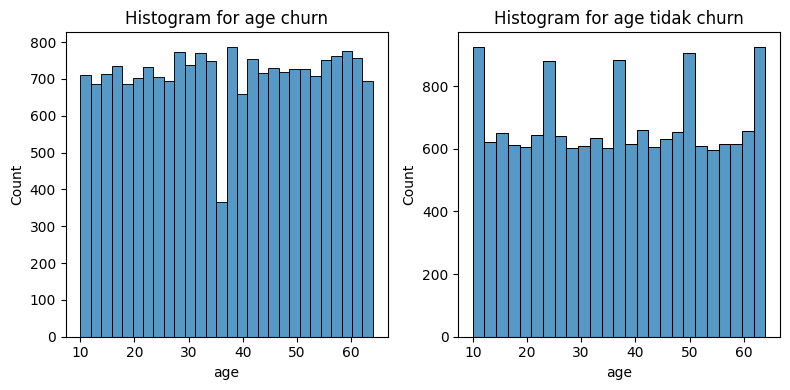

In [14]:
plt.figure(figsize=(8, 4))

# Churn
plt.subplot(1, 2, 1)
sns.histplot(data_churn['age'])
plt.title(f'Histogram for age churn')

# Tidak Churn
plt.subplot(1, 2, 2)
sns.histplot(data_tidak_churn['age'])
plt.title(f'Histogram for age tidak churn')

plt.tight_layout()
plt.show()

## Melihat perbandingan gender

Pada data churn 
jumlah Female adalah 10051 
Sedangkan Male adalah 9938

Pada data tidak churn 
Jumlah Female adalah 8516 
Sedangkan Male adalah 8446


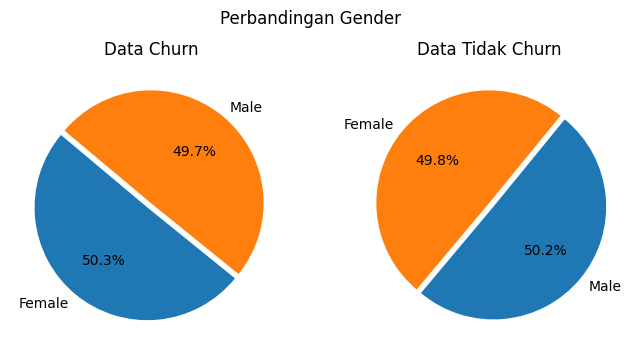

In [15]:
print(f"Pada data churn \njumlah Female adalah {data_churn['gender'].value_counts()[0]} \nSedangkan Male adalah {data_churn['gender'].value_counts()[1]}")
print ("")
print(f"Pada data tidak churn \nJumlah Female adalah {data_tidak_churn['gender'].value_counts()[0]} \nSedangkan Male adalah {data_tidak_churn['gender'].value_counts()[1]}")

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.pie(data_churn['gender'].value_counts(), labels=data_churn['gender'].value_counts().index, autopct='%.1f%%', explode=(0.05, 0), startangle= 140)
plt.title ("Data Churn")

plt.subplot(1, 2, 2)
plt.pie(data_tidak_churn['gender'].value_counts(), labels=data_tidak_churn['gender'].value_counts().index, autopct='%.1f%%', explode=(0.05, 0), startangle= 230)
plt.title ("Data Tidak Churn")

plt.suptitle('Perbandingan Gender')
plt.show()

## Melihat perbandingan region

Pada data churn:
Jumlah Town adalah 7661
Jumlah City adalah 6971
Jumlah Village adalah 2407

Pada data tidak churn:
Jumlah Town adalah 6474
Jumlah City adalah 5773
Jumlah Village adalah 2293


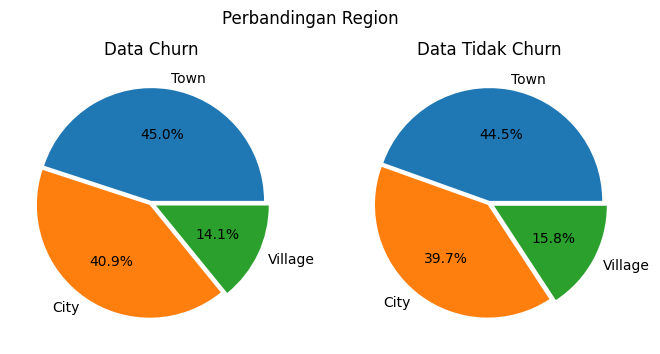

In [16]:
region_counts_churn = data_churn['region_category'].value_counts()
region_counts_tidak_churn = data_tidak_churn['region_category'].value_counts()

print ("Pada data churn:")
for region, count in region_counts_churn.items():
    print(f"Jumlah {region} adalah {count}")
print()

print ("Pada data tidak churn:")
for region, count in region_counts_tidak_churn.items():
    print(f"Jumlah {region} adalah {count}")

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.pie(data_churn['region_category'].value_counts(), labels=data_churn['region_category'].value_counts().index, autopct='%.1f%%', explode=(0.02, 0.02, 0.05))
plt.title ("Data Churn")

plt.subplot(1, 2, 2)
plt.pie(data_tidak_churn['region_category'].value_counts(), labels=data_tidak_churn['region_category'].value_counts().index, autopct='%.1f%%', explode=(0.02, 0.02, 0.05))
plt.title ("Data Tidak Churn")

plt.suptitle('Perbandingan Region')
plt.show()

## Melihat distribusi membership category

Pada data churn:
Jumlah Basic Membership adalah 7476
Jumlah No Membership adalah 7467
Jumlah Silver Membership adalah 2561
Jumlah Gold Membership adalah 2514

Pada data tidak churn:
Jumlah Premium Membership adalah 4458
Jumlah Platinum Membership adalah 4342
Jumlah Gold Membership adalah 4285
Jumlah Silver Membership adalah 3430
Jumlah Basic Membership adalah 251
Jumlah No Membership adalah 226


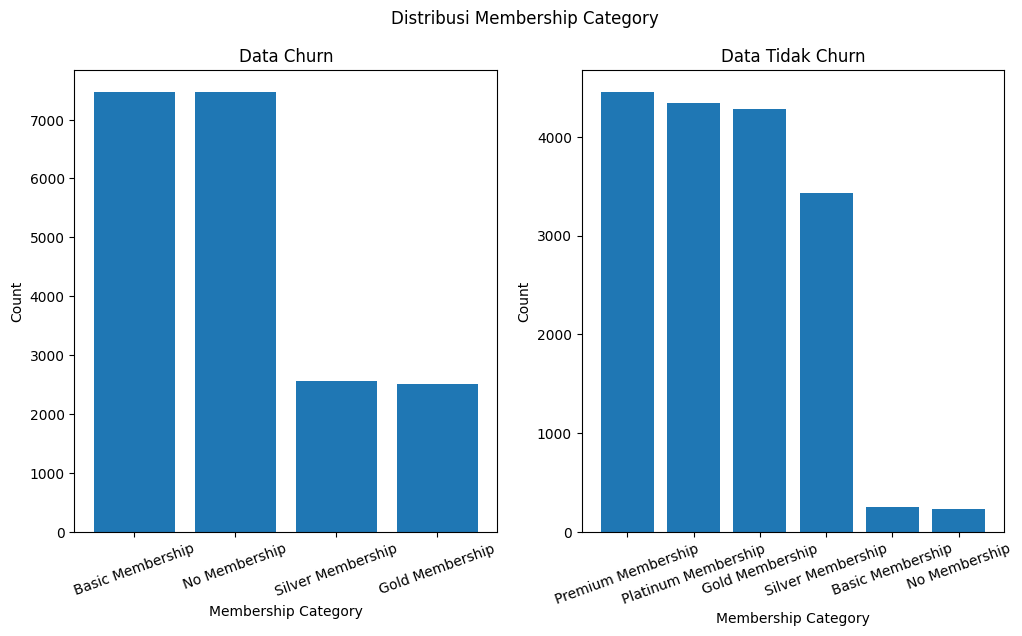

In [17]:
membership_counts_churn = data_churn['membership_category'].value_counts()
membership_counts_tidak_churn = data_tidak_churn['membership_category'].value_counts()

desired_order = ['No Membership', 'Basic Membership', 'Silver Membership', 'Platinum Membership', 'Gold Membership', 'Premium Membership']

print ("Pada data churn:")
for membership, count in membership_counts_churn.items():
    print(f"Jumlah {membership} adalah {count}")
print()

print ("Pada data tidak churn:")
for membership, count in membership_counts_tidak_churn.items():
    print(f"Jumlah {membership} adalah {count}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(membership_counts_churn.index, membership_counts_churn.values)
plt.title ("Data Churn")
plt.xticks(rotation=20)
plt.ylabel('Count')
plt.xlabel('Membership Category')

plt.subplot(1, 2, 2)
plt.bar(membership_counts_tidak_churn.index, membership_counts_tidak_churn.values)
plt.title ("Data Tidak Churn")
plt.xticks(rotation=20)
plt.ylabel('Count')
plt.xlabel('Membership Category')

plt.suptitle('Distribusi Membership Category')
plt.show;

## Melihat persebaran joining date

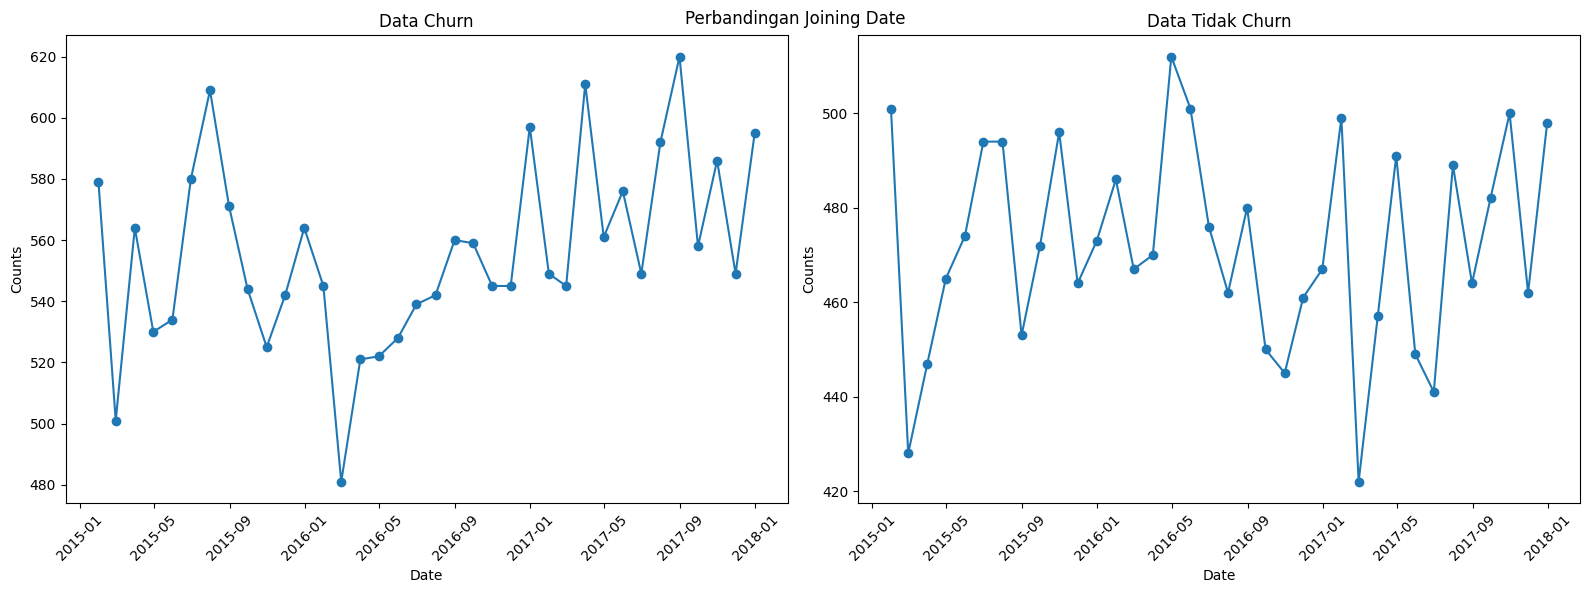

In [18]:
data_time_churn = data_churn.copy()
data_time_tidak_churn = data_tidak_churn.copy()

month_counts_churn = data_time_churn.resample('M', on='joining_date').size()
month_counts_tidak_churn = data_time_tidak_churn.resample('M', on='joining_date').size()



plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(month_counts_churn.index, month_counts_churn.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.title ("Data Churn")
plt.xticks(rotation=45)
plt.tight_layout() 

plt.subplot(1, 2, 2)
plt.plot(month_counts_tidak_churn.index, month_counts_tidak_churn.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.title ("Data Tidak Churn")
plt.xticks(rotation=45)
plt.tight_layout() 

plt.suptitle('Perbandingan Joining Date')
plt.show()

## Melihat perbandingan media pengguna

Pada data churn:
Jumlah Smartphone adalah 7667
Jumlah Desktop adalah 7418
Jumlah Both adalah 1983

Pada data tidak churn:
Jumlah Desktop adalah 6499
Jumlah Smartphone adalah 6218
Jumlah Both adalah 1830


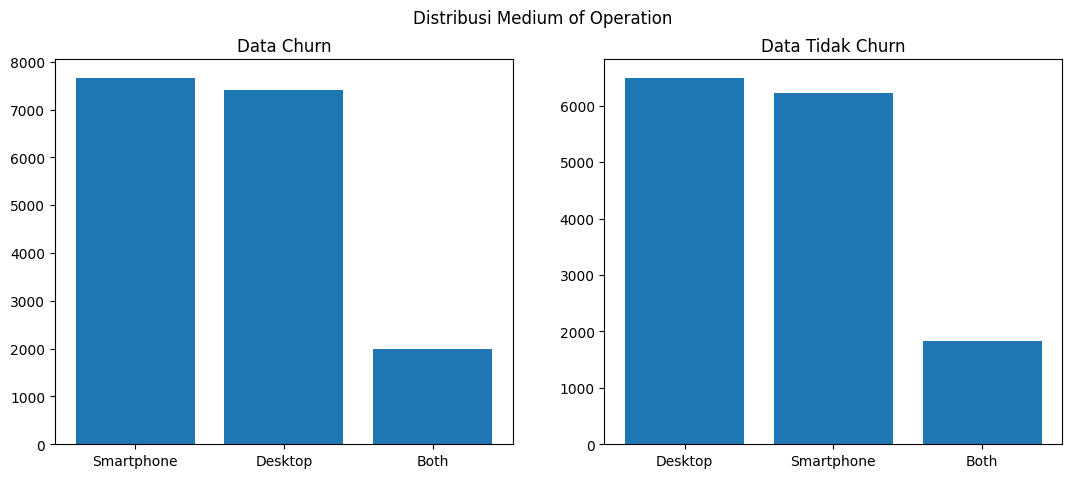

In [19]:
medium_counts_churn = data_churn['medium_of_operation'].value_counts()
medium_counts_tidak_churn = data_tidak_churn['medium_of_operation'].value_counts()

print ("Pada data churn:")
for medium, count in medium_counts_churn.items():
    print(f"Jumlah {medium} adalah {count}")
print()

print ("Pada data tidak churn:")
for medium, count in medium_counts_tidak_churn.items():
    print(f"Jumlah {medium} adalah {count}")
    
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
plt.bar(medium_counts_churn.index, medium_counts_churn.values)
plt.title ("Data Churn")

plt.subplot(1, 2, 2)
plt.bar(medium_counts_tidak_churn.index, medium_counts_tidak_churn.values)
plt.title ("Data Tidak Churn")

plt.suptitle('Distribusi Medium of Operation')
plt.show;

## Melihat distribusi jenis internet

Pada data churn:
Jumlah Mobile_Data adalah 6697
Jumlah Fiber_Optic adalah 6669
Jumlah Wi-Fi adalah 6652

Pada data tidak churn:
Jumlah Wi-Fi adalah 5765
Jumlah Mobile_Data adalah 5649
Jumlah Fiber_Optic adalah 5578


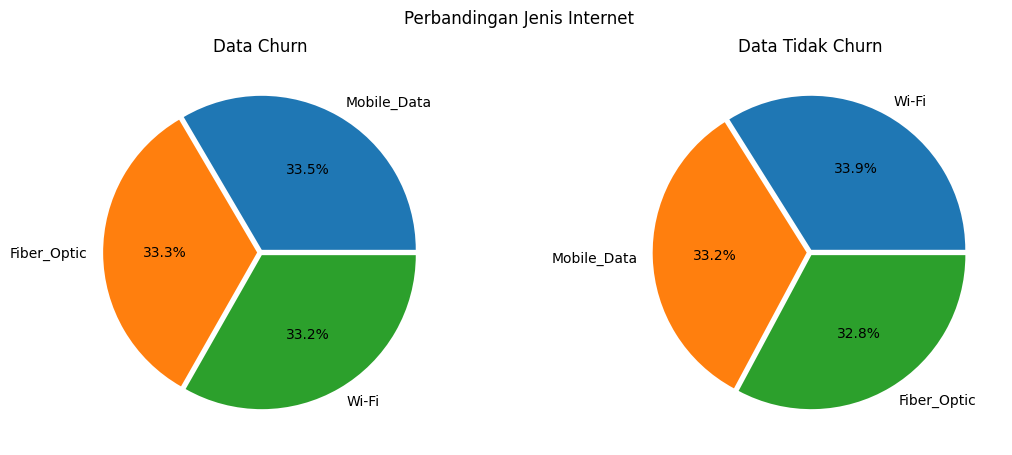

In [20]:
internet_counts_churn = data_churn['internet_option'].value_counts()
internet_counts_tidak_churn = data_tidak_churn['internet_option'].value_counts()

print ("Pada data churn:")
for internet, count in internet_counts_churn.items():
    print(f"Jumlah {internet} adalah {count}")
print()

print ("Pada data tidak churn:")
for internet, count in internet_counts_tidak_churn.items():
    print(f"Jumlah {internet} adalah {count}")

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.pie(data_churn['internet_option'].value_counts(), autopct='%.1f%%', labels = data_churn['internet_option'].value_counts().index, explode=(0.02, 0.02, 0.02))
plt.title ("Data Churn")

plt.subplot(1, 2, 2)
plt.pie(data_tidak_churn['internet_option'].value_counts(), autopct='%.1f%%', labels = data_tidak_churn['internet_option'].value_counts().index, explode=(0.02, 0.02, 0.02))
plt.title ("Data Tidak Churn")

plt.suptitle('Perbandingan Jenis Internet')
plt.show()

## Melihat distribusi rata-rata waktu penggunaan

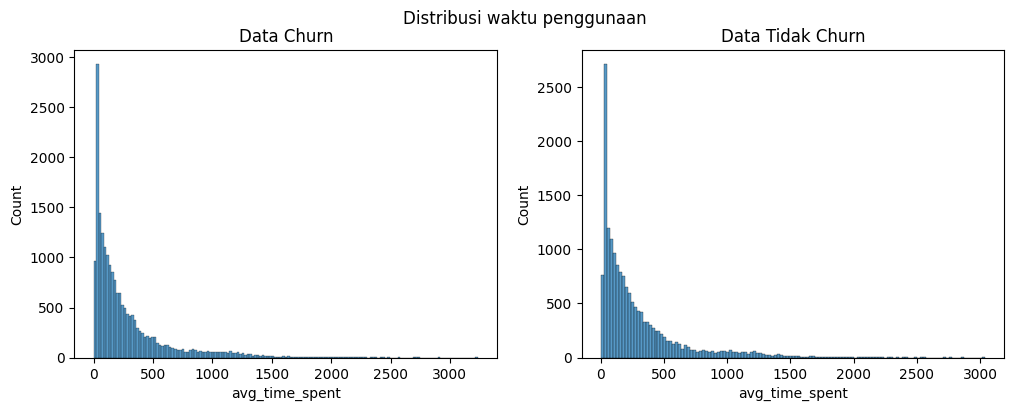

In [21]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot (data_churn['avg_time_spent'])
plt.title ("Data Churn")

plt.subplot(1, 2, 2)
sns.histplot (data_tidak_churn['avg_time_spent'])
plt.title ("Data Tidak Churn")

plt.suptitle('Distribusi waktu penggunaan')
plt.show()

## Melihat distribusi rata-rata nilai transaksi

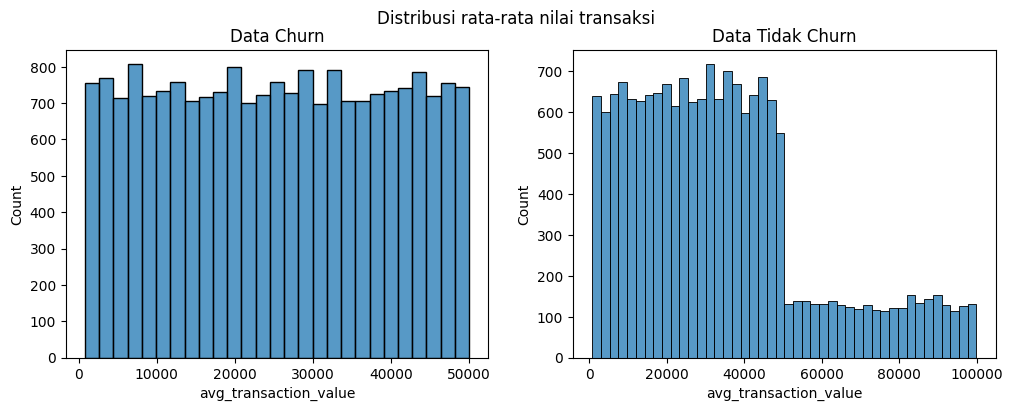

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot (data_churn['avg_transaction_value'])
plt.title ("Data Churn")

plt.subplot(1, 2, 2)
sns.histplot (data_tidak_churn['avg_transaction_value'])
plt.title ("Data Tidak Churn")


plt.suptitle('Distribusi rata-rata nilai transaksi')
plt.show()

## Melihat distribusi rata-rata frekuensi login

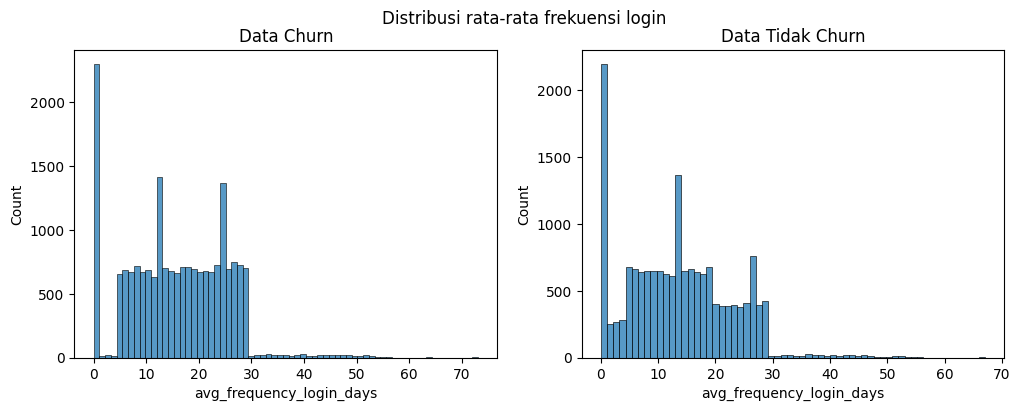

In [23]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot (data_churn['avg_frequency_login_days'])
plt.title ("Data Churn")

plt.subplot(1, 2, 2)
sns.histplot (data_tidak_churn['avg_frequency_login_days'])
plt.title ("Data Tidak Churn")


plt.suptitle('Distribusi rata-rata frekuensi login')
plt.show()

## Melihat distribusi poin di dompet

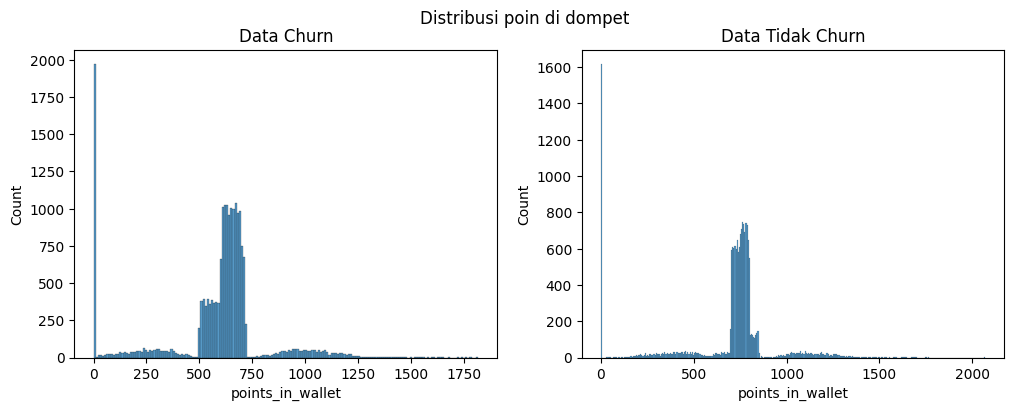

In [24]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot (data_churn['points_in_wallet'])
plt.title ("Data Churn")

plt.subplot(1, 2, 2)
sns.histplot (data_tidak_churn['points_in_wallet'])
plt.title ("Data Tidak Churn")


plt.suptitle('Distribusi poin di dompet')
plt.show()

## Melihat perbandingan churn risk

Jumlah 1 adalah 20018
Jumlah 0 adalah 16992


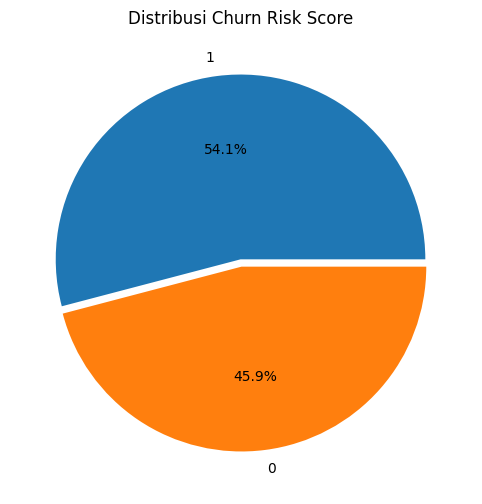

In [25]:
churn_counts = data['churn_risk_score'].value_counts()

for churn, count in churn_counts.items():
    print(f"Jumlah {churn} adalah {count}")

plt.figure(figsize=(10, 6))
plt.pie(x = churn_counts, labels = churn_counts.index, autopct='%.1f%%', explode=(0.02, 0.02))

plt.title('Distribusi Churn Risk Score')

plt.show;


# iv. Feature Engineering
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-val-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## v.1. Split X dan y

In [26]:
X = data.drop ('churn_risk_score', axis = 1)
y = data ['churn_risk_score']

## v.2. Split Train-Set, Val-Set, dan Test-Set

In [27]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=1509)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.1, random_state=1509)

print ('Train Size :', X_train.shape)
print ('Train Val Size :', X_train_val.shape)
print ('Val Size :', X_val.shape)
print ('test Size: ', X_test.shape)

Train Size : (26647, 21)
Train Val Size : (29608, 21)
Val Size : (2961, 21)
test Size:  (7402, 21)


## v.3. Handle Missing Value

In [28]:
# Mengecek missing value pada semua data

def missing_check(data):
    total = data.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    return missing_data

missing_check(data)

,Total,Percent
joined_through_referral,5442,14.704134
region_category,5431,14.674412
medium_of_operation,5395,14.577141
preferred_offer_types,288,0.778168
gender,59,0.159416
user_id,0,0.000000
avg_frequency_login_days,0,0.000000
feedback,0,0.000000
complaint_status,0,0.000000
past_complaint,0,0.000000


Terdapat hanya 5 kolom yang terdapat missing value, data-data tersebut sudah terbagi dalam data train, test, dan val, untuk menindaklanjuti data yang hilang tersebut ada pada masing-masing data set

### Data X_train

In [29]:
# X_train
def missing_check(data):
    total = X_train.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (X_train.isnull().sum()/X_train.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    return missing_data

missing_check(X_train)

,Total,Percent
joined_through_referral,3933,14.759635
medium_of_operation,3924,14.725860
region_category,3894,14.613277
preferred_offer_types,204,0.765565
gender,45,0.168875
user_id,0,0.000000
avg_transaction_value,0,0.000000
complaint_status,0,0.000000
past_complaint,0,0.000000
offer_application_preference,0,0.000000


In [30]:
# Pada kolom gender
X_train[X_train.gender.isnull()].T

,4328,14087,11800,4023,9370,10818,26383,3926,728,5912,...,18942,23288,10825,34498,26371,36690,30704,145,15888,7477
user_id,8c8af015fb0c05cd,8184a62c070dc221,833e32d8b6c25f94,9518edceea074d43,80eb4820f89bb9a5,adeb6395f7f2e08a,a6ad9bc8cb3943d8,8ace27a9d93861b0,b85b3149c460cd02,8d67e181f8dac02a,...,a4572ee8aa23cab4,8cf3ad1b66d21d44,88355b9d3bd17d88,83c31a9c3ca734e8,825f732c71a2c195,bf3b4a1f02e2789c,be7e9a807808038b,a159641a5f8deac9,8c73e95582c7b0fb,ba6b542b16090c65
age,52,25,63,26,31,59,13,13,40,53,...,54,11,50,54,40,44,34,47,64,17
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_category,Town,NaN,Town,City,NaN,NaN,NaN,Town,City,Village,...,Town,Town,Town,Town,Town,Town,City,Town,City,Town
membership_category,Gold Membership,Silver Membership,Basic Membership,Basic Membership,Basic Membership,Gold Membership,No Membership,No Membership,Silver Membership,Basic Membership,...,No Membership,Basic Membership,Premium Membership,No Membership,No Membership,Platinum Membership,Gold Membership,Silver Membership,Basic Membership,Platinum Membership
joining_date,2017-08-03 00:00:00,2016-09-05 00:00:00,2016-09-01 00:00:00,2017-05-07 00:00:00,2016-10-01 00:00:00,2015-01-29 00:00:00,2016-06-22 00:00:00,2016-09-18 00:00:00,2017-01-01 00:00:00,2015-09-13 00:00:00,...,2015-02-08 00:00:00,2015-01-16 00:00:00,2015-11-23 00:00:00,2017-07-11 00:00:00,2017-08-28 00:00:00,2016-09-04 00:00:00,2015-04-15 00:00:00,2015-04-20 00:00:00,2017-02-25 00:00:00,2016-01-19 00:00:00
joined_through_referral,Yes,No,Yes,NaN,Yes,NaN,No,NaN,No,Yes,...,Yes,Yes,NaN,Yes,NaN,Yes,Yes,Yes,NaN,No
preferred_offer_types,Gift Vouchers/Coupons,Credit/Debit Card Offers,Credit/Debit Card Offers,Without Offers,Credit/Debit Card Offers,Gift Vouchers/Coupons,Credit/Debit Card Offers,Credit/Debit Card Offers,Without Offers,Gift Vouchers/Coupons,...,Without Offers,Without Offers,Without Offers,Credit/Debit Card Offers,Credit/Debit Card Offers,Gift Vouchers/Coupons,Credit/Debit Card Offers,Gift Vouchers/Coupons,Without Offers,Gift Vouchers/Coupons
medium_of_operation,NaN,Smartphone,Desktop,Smartphone,Smartphone,Desktop,Smartphone,Smartphone,Desktop,NaN,...,NaN,Desktop,Smartphone,Both,Desktop,Smartphone,Desktop,Desktop,Desktop,Both
internet_option,Mobile_Data,Fiber_Optic,Wi-Fi,Wi-Fi,Wi-Fi,Fiber_Optic,Fiber_Optic,Fiber_Optic,Mobile_Data,Mobile_Data,...,Fiber_Optic,Mobile_Data,Mobile_Data,Mobile_Data,Wi-Fi,Mobile_Data,Fiber_Optic,Wi-Fi,Wi-Fi,Wi-Fi


Berdasarkan kolom diatas, tidak adanya kaitan antara gender dengan kolom lainnya, tidak ada pola yang terlihat, dan dari jumlah dari keseluruhan data dibawah 1%, dan pada EDA gendernya tidak ada modus alias kurang lebih sama jumlahnya, sehingga digunakan imputasi random sampel

In [31]:
random_sample_X_train_gender = X_train['gender'].dropna().sample(X_train['gender'].isnull().sum(), random_state=1509)
random_sample_X_train_gender.index =  X_train[X_train['gender'].isnull()].index

X_train.loc[X_train['gender'].isnull(), "gender"] = random_sample_X_train_gender

In [32]:
# Pada kolom gender
X_train[X_train.preferred_offer_types.isnull()].T

,25111,29885,34911,29402,23379,25724,21966,26096,27519,35203,...,12886,34317,10632,27315,13565,23576,16575,4705,8367,34466
user_id,aa2177cdb0659158,bb8b030e3a967684,82f52a628a5e2d1f,aea763ed6ead2fc0,b806ca2187fbb55a,95bd6fe00ef23fa2,bd15271b2be8b30b,b82603c9c5a9a320,921396864a4ae607,b9d628097f3dda92,...,9ac88f3fac257506,a823a0f056c740ad,a2b058bac560f01a,80f0241076d1f43d,a44897091906e8dd,88c36a072bd4a3b7,9b01000bb08c064c,802a11bb1dafef14,a951764daadc31f3,8d2e78b8104fa23b
age,64,60,49,21,51,44,29,60,51,42,...,35,38,19,41,55,53,32,50,39,24
gender,Female,Male,Male,Female,Female,Female,Male,Female,Female,Male,...,Male,Male,Male,Female,Male,Female,Male,Female,Male,Male
region_category,Town,NaN,City,Town,City,City,NaN,Town,City,City,...,NaN,Town,Town,Town,City,Town,NaN,Town,City,Village
membership_category,Gold Membership,Gold Membership,Basic Membership,Platinum Membership,Platinum Membership,Basic Membership,No Membership,No Membership,Basic Membership,Basic Membership,...,Silver Membership,Silver Membership,Basic Membership,Gold Membership,Gold Membership,Gold Membership,Gold Membership,Premium Membership,Premium Membership,Platinum Membership
joining_date,2017-01-11 00:00:00,2016-03-24 00:00:00,2016-04-27 00:00:00,2017-06-05 00:00:00,2017-07-04 00:00:00,2017-02-15 00:00:00,2017-05-17 00:00:00,2017-07-10 00:00:00,2015-11-07 00:00:00,2016-07-08 00:00:00,...,2016-06-28 00:00:00,2017-04-27 00:00:00,2015-01-05 00:00:00,2015-04-25 00:00:00,2016-04-09 00:00:00,2017-01-24 00:00:00,2017-02-27 00:00:00,2017-02-21 00:00:00,2016-11-27 00:00:00,2016-08-17 00:00:00
joined_through_referral,Yes,Yes,Yes,No,NaN,NaN,No,Yes,Yes,Yes,...,No,Yes,No,Yes,No,No,Yes,Yes,No,Yes
preferred_offer_types,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium_of_operation,NaN,Desktop,Both,Smartphone,Desktop,Desktop,Smartphone,Smartphone,Desktop,Smartphone,...,Smartphone,Smartphone,Smartphone,Desktop,NaN,Desktop,Desktop,Desktop,Desktop,NaN
internet_option,Mobile_Data,Wi-Fi,Wi-Fi,Wi-Fi,Fiber_Optic,Mobile_Data,Wi-Fi,Wi-Fi,Fiber_Optic,Fiber_Optic,...,Wi-Fi,Mobile_Data,Fiber_Optic,Mobile_Data,Wi-Fi,Mobile_Data,Fiber_Optic,Mobile_Data,Wi-Fi,Wi-Fi


Sama halnya pada kolom preferred_offer_types, tidak adanya kaitan dengan kolom lainnya, makan akan diperlakukan sama dengan kolom gender

In [33]:
random_sample_X_train_preferred_offer_types = X_train['preferred_offer_types'].dropna().sample(X_train['preferred_offer_types'].isnull().sum(), random_state=1509)
random_sample_X_train_preferred_offer_types.index =  X_train[X_train['preferred_offer_types'].isnull()].index

X_train.loc[X_train['preferred_offer_types'].isnull(), "preferred_offer_types"] = random_sample_X_train_preferred_offer_types

Sedangkan pada missing value yang diatas 10%, karena termasuk MCAR jadi didrop datanya

In [34]:
X_train = X_train.dropna()

Mengecek setelah dilakukan handling missing value

In [35]:
X_train.isnull().sum()

user_id                         0
age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

### Data y_train

In [36]:
y_train.isnull().sum()

0

### Data X_Val

In [37]:
# X_val

def missing_check(data):
    total = X_val.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (X_val.isnull().sum()/X_val.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    return missing_data

missing_check(X_val)

,Total,Percent
region_category,456,15.400203
joined_through_referral,439,14.826072
medium_of_operation,415,14.015535
preferred_offer_types,25,0.844309
gender,5,0.168862
user_id,0,0.000000
avg_transaction_value,0,0.000000
complaint_status,0,0.000000
past_complaint,0,0.000000
offer_application_preference,0,0.000000


Jika dilihat seperti pada data X_train, maka datanya akan diperlakukan sama

In [38]:
random_sample_X_val_gender = X_val['gender'].dropna().sample(X_val['gender'].isnull().sum(), random_state=1509)
random_sample_X_val_gender.index =  X_val[X_val['gender'].isnull()].index

X_val.loc[X_val['gender'].isnull(), "gender"] = random_sample_X_val_gender

random_sample_X_val_preferred_offer_types = X_val['preferred_offer_types'].dropna().sample(X_val['preferred_offer_types'].isnull().sum(), random_state=1509)
random_sample_X_val_preferred_offer_types.index =  X_val[X_val['preferred_offer_types'].isnull()].index

X_val.loc[X_val['preferred_offer_types'].isnull(), "preferred_offer_types"] = random_sample_X_val_preferred_offer_types

X_val = X_val.dropna()

X_val.isnull().sum()

user_id                         0
age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

### Data y_val

In [39]:
# y_val

y_val.isnull().sum()

0

### Data X_train_val

In [40]:
# X_train_val

def missing_check(data):
    total = X_train_val.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (X_train_val.isnull().sum()/X_train_val.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    return missing_data

missing_check(X_train_val)

,Total,Percent
joined_through_referral,4372,14.766279
region_category,4350,14.691975
medium_of_operation,4339,14.654823
preferred_offer_types,229,0.773440
gender,50,0.168873
user_id,0,0.000000
avg_transaction_value,0,0.000000
complaint_status,0,0.000000
past_complaint,0,0.000000
offer_application_preference,0,0.000000


Jika dilihat seperti pada data X_train, maka datanya akan diperlakukan sama

In [41]:
random_sample_X_train_val_gender = X_train_val['gender'].dropna().sample(X_train_val['gender'].isnull().sum(), random_state=1509)
random_sample_X_train_val_gender.index =  X_train_val[X_train_val['gender'].isnull()].index

X_train_val.loc[X_train_val['gender'].isnull(), "gender"] = random_sample_X_train_val_gender

random_sample_X_train_val_preferred_offer_types = X_train_val['preferred_offer_types'].dropna().sample(X_train_val['preferred_offer_types'].isnull().sum(), random_state=1509)
random_sample_X_train_val_preferred_offer_types.index =  X_train_val[X_train_val['preferred_offer_types'].isnull()].index

X_train_val.loc[X_train_val['preferred_offer_types'].isnull(), "preferred_offer_types"] = random_sample_X_train_val_preferred_offer_types

X_train_val = X_train_val.dropna()

X_train_val.isnull().sum()

user_id                         0
age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

### Data y_train_val

In [42]:
# y_train_val

y_train_val.isnull().sum()

0

### Data X_test

In [43]:
# X_test

def missing_check(data):
    total = X_test.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (X_test.isnull().sum()/X_test.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    return missing_data

missing_check(X_test)

,Total,Percent
region_category,1081,14.604161
joined_through_referral,1070,14.455553
medium_of_operation,1056,14.266414
preferred_offer_types,59,0.797082
gender,9,0.121589
user_id,0,0.000000
avg_transaction_value,0,0.000000
complaint_status,0,0.000000
past_complaint,0,0.000000
offer_application_preference,0,0.000000


Jika dilihat seperti pada data X_train, maka datanya akan diperlakukan sama

In [44]:
random_sample_X_test_gender = X_test['gender'].dropna().sample(X_test['gender'].isnull().sum(), random_state=1509)
random_sample_X_test_gender.index =  X_test[X_test['gender'].isnull()].index

X_test.loc[X_test['gender'].isnull(), "gender"] = random_sample_X_test_gender

random_sample_X_test_preferred_offer_types = X_test['preferred_offer_types'].dropna().sample(X_test['preferred_offer_types'].isnull().sum(), random_state=1509)
random_sample_X_test_preferred_offer_types.index =  X_test[X_test['preferred_offer_types'].isnull()].index

X_test.loc[X_test['preferred_offer_types'].isnull(), "preferred_offer_types"] = random_sample_X_test_preferred_offer_types

X_test = X_test.dropna()

X_test.isnull().sum()

user_id                         0
age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

### Data y_test

In [45]:
# y_test

y_test.isnull().sum()

0

## v.4. Handle Outlier

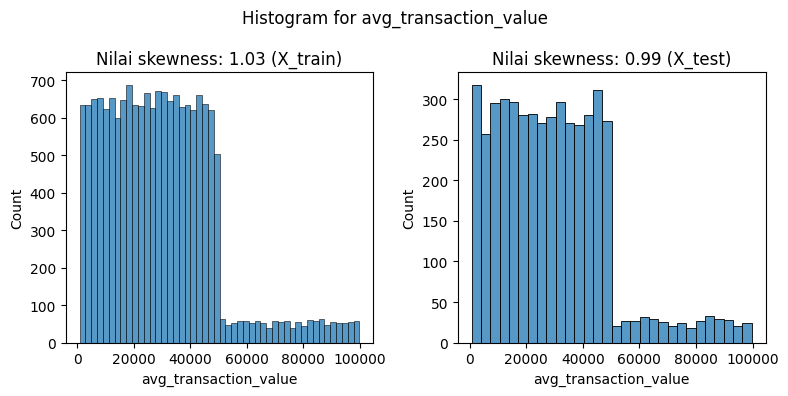

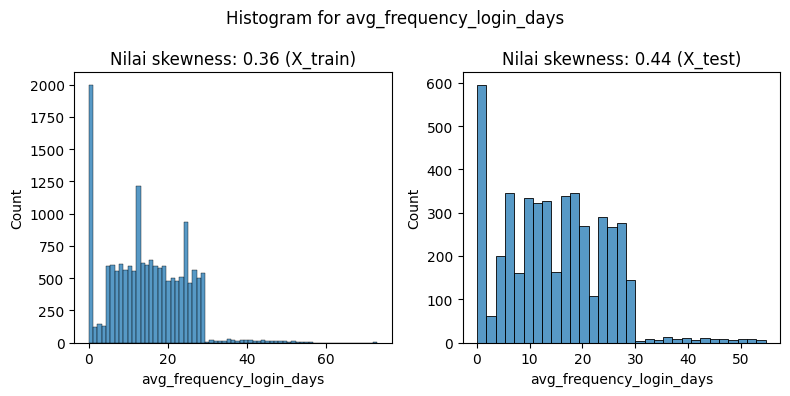

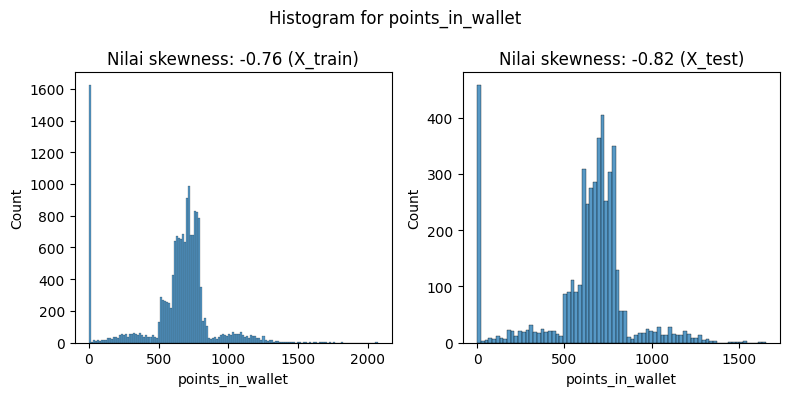

In [46]:
kolom = ['avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']

for i in kolom:
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[i])
    plt.title(f'Histogram for {i} X_train')

    skewness_X_train = X_train[i].skew()
    plt.title(f'Nilai skewness: {skewness_X_train:.2f} (X_train)')

    plt.subplot(1, 2, 2)
    sns.histplot(X_test[i])
    plt.title(f'Histogram for {i} X_test')
    
    skewness_X_test = X_test[i].skew()
    plt.title(f'Nilai skewness: {skewness_X_test:.2f} (X_test)')

    plt.suptitle(f'Histogram for {i}')
    plt.tight_layout()
    plt.show()

In [47]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='right', # cap left, right or both tails
                          fold=1.5,
                          variables=kolom)

windsoriser.fit(X_train)

X_train_t = windsoriser.transform(X_train)
X_val_t = windsoriser.transform(X_val)
X_train_val_t = windsoriser.transform(X_train_val)
X_test_t = windsoriser.transform(X_test)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Right Tail Caps :  {'avg_transaction_value': 80217.47375, 'avg_frequency_login_days': 43.0, 'points_in_wallet': 1036.2}


## v.5. Feature Selection


In [48]:
# Menghilangkan data di y_train yang hilang saat outlier pada X_train
y_train = y_train.filter(items=X_train.index,axis=0)
y_test = y_test.filter(items=X_test.index,axis=0)
y_val = y_val.filter(items=X_val.index,axis=0)

### Cek Korelasi antar kolom

In [49]:
# Menggunakan Chi-square karena banyak data kategori

kolom = ['user_id', 'age', 'gender', 'region_category', 'membership_category',
         'joining_date', 'joined_through_referral', 'preferred_offer_types',
         'medium_of_operation', 'internet_option', 'last_visit_time',
         'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
         'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
         'offer_application_preference', 'past_complaint', 'complaint_status',
         'feedback']

contingency_tables = {} 
results_table = []

for i in kolom:
    contingency_table = pd.crosstab(data[i], data['churn_risk_score'])
    contingency_tables[i] = contingency_table

    stat, p, dof, expected = stats.chi2_contingency(contingency_table)
    if p > 0.05:
        result = 'Probably independent'
    else:
        result = 'Probably dependent'

    results_table.append([i, p, result])

table_headers = ['Column', 'p-value', 'Result']
print(tabulate(results_table, headers=table_headers))

Column                             p-value  Result
----------------------------  ------------  --------------------
user_id                       0.471184      Probably independent
age                           0.682503      Probably independent
gender                        0.354245      Probably independent
region_category               0.000165458   Probably dependent
membership_category           0             Probably dependent
joining_date                  0.798946      Probably independent
joined_through_referral       1.53965e-10   Probably dependent
preferred_offer_types         3.90801e-16   Probably dependent
medium_of_operation           0.000191507   Probably dependent
internet_option               0.347248      Probably independent
last_visit_time               0.267299      Probably independent
days_since_last_login         0.0947267     Probably independent
avg_time_spent                0.429831      Probably independent
avg_transaction_value         0.469164      Proba

In [50]:
# Karena tidak berhubungan, makan didrop

X_train.drop (['user_id', 'age', 'gender', 'joining_date', 'internet_option', 'last_visit_time', 
              'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'past_complaint', 
              'complaint_status'], axis=1, inplace=True)
X_train_val.drop(['user_id', 'age', 'gender', 'joining_date', 'internet_option', 'last_visit_time', 
              'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'past_complaint', 
              'complaint_status'], axis=1, inplace=True)
X_val.drop(['user_id', 'age', 'gender', 'joining_date', 'internet_option', 'last_visit_time', 
              'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'past_complaint', 
              'complaint_status'], axis=1, inplace=True)
X_test.drop(['user_id', 'age', 'gender', 'joining_date', 'internet_option', 'last_visit_time', 
              'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'past_complaint', 
              'complaint_status'], axis=1, inplace=True)
X_train

,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,feedback
6267,City,Basic Membership,Yes,Credit/Debit Card Offers,Desktop,24.0,552.16,Yes,No,Poor Website
23235,Town,Gold Membership,Yes,Credit/Debit Card Offers,Smartphone,5.0,620.89,No,Yes,No reason specified
16690,City,No Membership,Yes,Gift Vouchers/Coupons,Smartphone,28.0,621.65,No,Yes,Poor Customer Service
28000,City,Basic Membership,No,Credit/Debit Card Offers,Smartphone,18.0,530.29,Yes,No,Too many ads
29165,Village,No Membership,Yes,Gift Vouchers/Coupons,Both,0.0,0.00,Yes,No,No reason specified
...,...,...,...,...,...,...,...,...,...,...
16875,Village,Premium Membership,Yes,Gift Vouchers/Coupons,Desktop,13.0,0.00,Yes,No,Products always in Stock
981,Town,No Membership,Yes,Credit/Debit Card Offers,Smartphone,0.0,524.50,Yes,No,No reason specified
10377,City,Premium Membership,Yes,Credit/Debit Card Offers,Desktop,6.0,755.50,Yes,No,Reasonable Price
19414,Village,Premium Membership,No,Without Offers,Smartphone,13.0,798.51,Yes,No,No reason specified


### Membagi numerical dan categorical

In [51]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(exclude=np.number).columns.tolist()

print ('Numerical Columns : ', num_columns)
print ('Categorical Columns : ', cat_columns)

Numerical Columns :  ['avg_frequency_login_days', 'points_in_wallet']
Categorical Columns :  ['region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'used_special_discount', 'offer_application_preference', 'feedback']


### Pipeline

In [52]:
num_pipeline = make_pipeline (StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [53]:
X_train = final_pipeline.fit_transform(X_train_t)
X_train_val = final_pipeline.transform(X_train_val_t)
X_val = final_pipeline.transform (X_val_t)
X_test = final_pipeline.transform (X_test_t)

X_train.shape

(16574, 32)

# v. Modeling

In [54]:
# Clear Session

seed = 1509
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow Pipeline

In [58]:
train_pipe = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).shuffle(100).repeat(2).prefetch(tf.data.AUTOTUNE)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)

## v.1 Model Sequential Baseline

Model Definition

In [71]:
model_sequential = Sequential()
# Hidden Layer 1
model_sequential.add(Dense(16,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(32,))) 
# Hidden Layer 2
model_sequential.add(Dense(8,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) 
# Output Layer
model_sequential.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) 

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


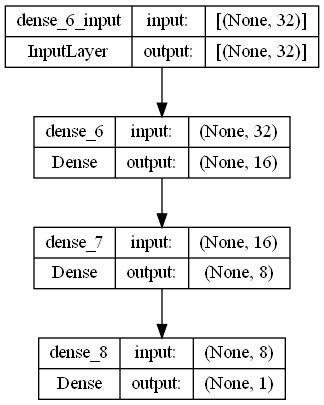

In [72]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

Model Training

In [73]:
history_seq = model_sequential.fit(train_pipe,
                                   epochs=32,
                                   validation_data=val_pipe,
                                   batch_size=10)

Epoch 1/32


1036/1036 [==============================] - 8s 7ms/step - loss: 0.3254 - accuracy: 0.8399 - val_loss: 0.2535 - val_accuracy: 0.8672
Epoch 2/32
1036/1036 [==============================] - 7s 7ms/step - loss: 0.2533 - accuracy: 0.8863 - val_loss: 0.2443 - val_accuracy: 0.8906
Epoch 3/32
1036/1036 [==============================] - 8s 7ms/step - loss: 0.2453 - accuracy: 0.8972 - val_loss: 0.2380 - val_accuracy: 0.8906
Epoch 4/32
1036/1036 [==============================] - 6s 6ms/step - loss: 0.2296 - accuracy: 0.9114 - val_loss: 0.2178 - val_accuracy: 0.9173
Epoch 5/32
 760/1036 [=====================>........] - ETA: 1s - loss: 0.2123 - accuracy: 0.9196

Model Evaluation

In [ ]:
history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.325983,0.838029,0.253609,0.874864
1,0.253471,0.884699,0.250063,0.871055
2,0.244835,0.896675,0.234996,0.899347
3,0.228374,0.911609,0.217035,0.916757
4,0.208995,0.921745,0.200108,0.915669
5,0.194466,0.925003,0.187047,0.919478
6,0.185566,0.927024,0.181277,0.917845
7,0.179989,0.928261,0.180011,0.921110
8,0.176521,0.928623,0.180886,0.920022
9,0.173422,0.929830,0.180675,0.916757


<Axes: >

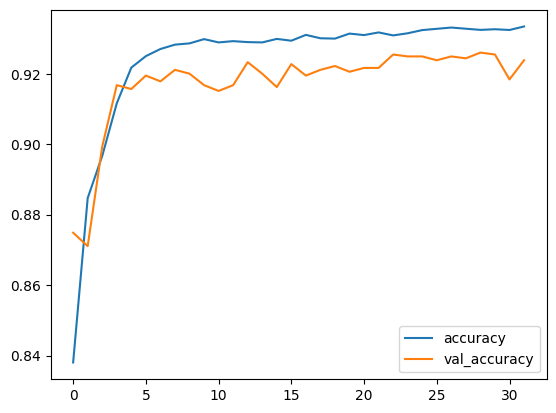

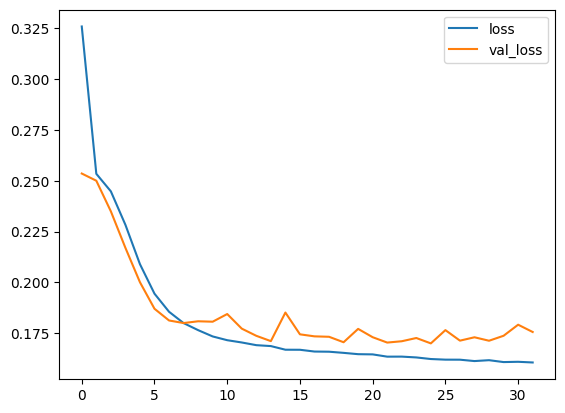

In [ ]:
history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

Confusion Matrix

146/146 [==============================] - 0s 2ms/step
Sequential Test Accuracy: 0.9283107963082207
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2142
           1       0.94      0.93      0.93      2517

    accuracy                           0.93      4659
   macro avg       0.93      0.93      0.93      4659
weighted avg       0.93      0.93      0.93      4659



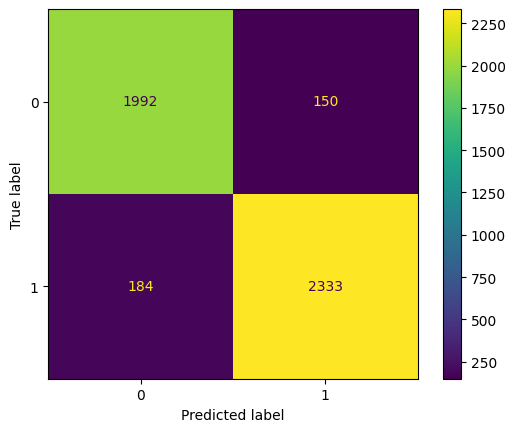

In [ ]:
y_pred_seq = model_sequential.predict(X_test)

y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

accuracy_seq = accuracy_score(y_test, y_pred_seq)
print(f"Sequential Test Accuracy: {accuracy_seq}")

cm_test_seq = confusion_matrix(y_test,y_pred_seq)
ConfusionMatrixDisplay(cm_test_seq).plot()
print(classification_report(y_test, y_pred_seq))

## v.2 Model Functional Baseline

Model Definition

In [ ]:
input_layer = Input(shape=(32,))
hidden_layer_1 = Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional = Model (inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 32)           1056        ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 16)           528         ['dense_3[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 48)           0           ['input_2[0][0]',                
                                                                  'dense_4[0][0]']          

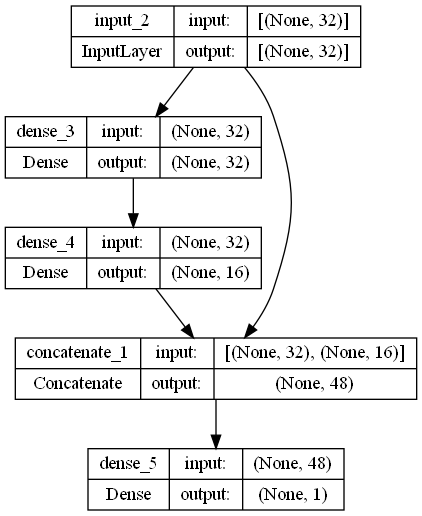

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

Model Training

In [ ]:
history_func = model_functional.fit(train_pipe,
                                    epochs=32,
                                    validation_data=val_pipe,
                                    batch_size=10)

Epoch 1/32


1036/1036 [==============================] - 7s 7ms/step - loss: 0.3077 - accuracy: 0.8500 - val_loss: 0.2454 - val_accuracy: 0.8836
Epoch 2/32
1036/1036 [==============================] - 6s 6ms/step - loss: 0.2498 - accuracy: 0.8886 - val_loss: 0.2370 - val_accuracy: 0.8912
Epoch 3/32
1036/1036 [==============================] - 6s 6ms/step - loss: 0.2294 - accuracy: 0.9113 - val_loss: 0.2166 - val_accuracy: 0.9037
Epoch 4/32
1036/1036 [==============================] - 6s 6ms/step - loss: 0.2032 - accuracy: 0.9242 - val_loss: 0.1897 - val_accuracy: 0.9266
Epoch 5/32
1036/1036 [==============================] - 6s 6ms/step - loss: 0.1862 - accuracy: 0.9280 - val_loss: 0.1805 - val_accuracy: 0.9266
Epoch 6/32
1036/1036 [==============================] - 6s 6ms/step - loss: 0.1775 - accuracy: 0.9301 - val_loss: 0.1796 - val_accuracy: 0.9233
Epoch 7/32
1036/1036 [==============================] - 6s 5ms/step - loss: 0.1736 - accuracy: 0.9299 - val_loss: 0.1834 - val_accuracy: 0.9173
Epo

Model Evaluation

In [ ]:
history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.307691,0.849976,0.245428,0.883569
1,0.249823,0.888560,0.236973,0.891186
2,0.229410,0.911307,0.216556,0.903700
3,0.203200,0.924158,0.189653,0.926551
4,0.186226,0.927959,0.180548,0.926551
5,0.177493,0.930071,0.179623,0.923286
6,0.173563,0.929860,0.183383,0.917301
7,0.170999,0.930584,0.182577,0.920022
8,0.168620,0.931399,0.176877,0.922742
9,0.166935,0.929739,0.180439,0.921654


<Axes: >

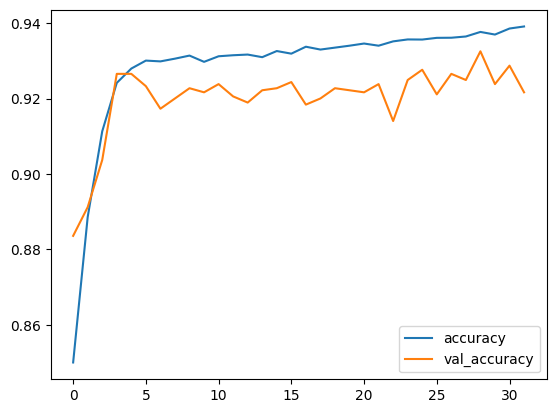

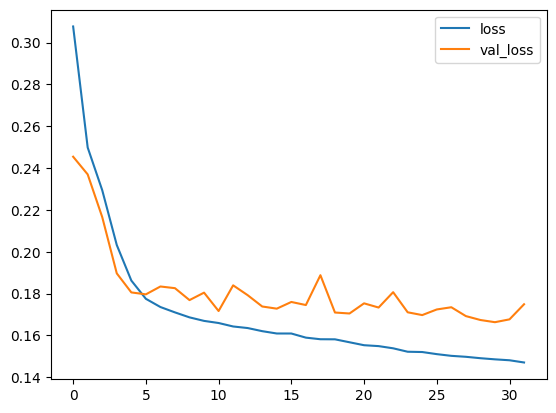

In [ ]:
history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

Confusion Matrix

 89/146 [=================>............] - ETA: 0s

146/146 [==============================] - 0s 2ms/step
Functional Test Accuracy: 0.9285254346426272
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2142
           1       0.94      0.93      0.93      2517

    accuracy                           0.93      4659
   macro avg       0.93      0.93      0.93      4659
weighted avg       0.93      0.93      0.93      4659



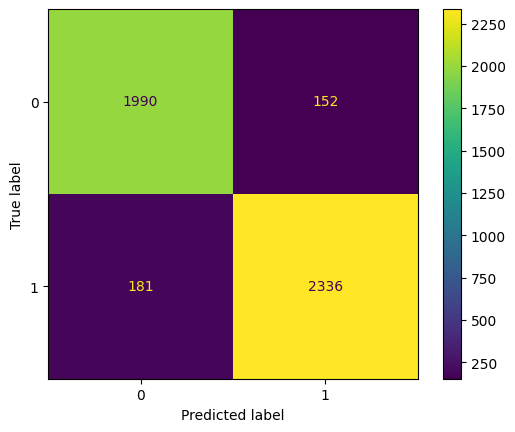

In [ ]:
y_pred_func = model_functional.predict(X_test)

y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

accuracy_func = accuracy_score(y_test, y_pred_func)
print(f"Functional Test Accuracy: {accuracy_func}")

cm_test_func = confusion_matrix(y_test,y_pred_func)
ConfusionMatrixDisplay(cm_test_func).plot()
print(classification_report(y_test, y_pred_func))

## v.3 Model Sequential Improvement

Model Definition

In [ ]:
def create_model(optimizer='adam', activation='relu', hidden_units=32):
    model = Sequential()
    model.add(Dense(hidden_units, 
                    activation=activation, 
                    input_dim=X_train.shape[1], 
                    kernel_initializer=tf.initializers.HeNormal(seed)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(rate=0.2))
    model.add(Dense(hidden_units/2, 
                    activation=activation, 
                    input_dim=X_train.shape[1], 
                    kernel_initializer=tf.initializers.HeNormal(seed)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(rate=0.2))
    model.add(Dense(1, 
                    activation='sigmoid', 
                    kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model_sequential_improvement = wrappers.KerasClassifier(model=create_model, epochs=10, batch_size=16, verbose=0, optimizer='adam', activation='relu', hidden_units=32)

Model Training

In [ ]:
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'sigmoid'],
    'hidden_units': [16, 32, 64]
}

grid_search_seq_imp = GridSearchCV(estimator=model_sequential_improvement, param_grid=param_grid, cv=3)
grid_search_seq_imp.fit(X_train, y_train, validation_data=(X_val, y_val))

best_params_seq_imp = grid_search_seq_imp.best_params_
best_model_seq_imp = grid_search_seq_imp.best_estimator_

Confusion Matrix

Best Parameters: {'activation': 'relu', 'hidden_units': 64, 'optimizer': 'adam'}
Test Accuracy: 0.9285254346426272
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2142
           1       0.92      0.95      0.93      2517

    accuracy                           0.93      4659
   macro avg       0.93      0.93      0.93      4659
weighted avg       0.93      0.93      0.93      4659



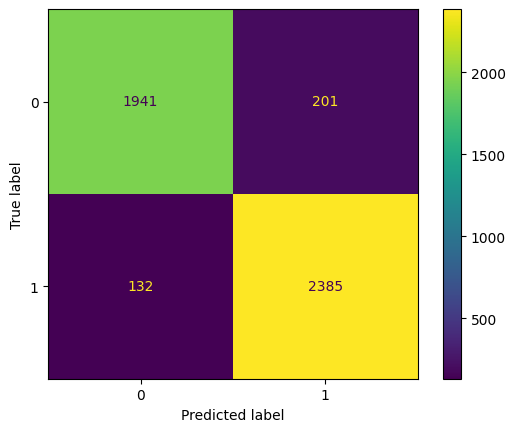

In [ ]:
y_pred_seq_imp = best_model_seq_imp.predict(X_test)
y_pred_seq_imp = (y_pred_seq_imp > 0.5).astype(int)  
accuracy_seq_imp = accuracy_score(y_test, y_pred_seq_imp)

print(f"Best Parameters: {best_params_seq_imp}")
print(f"Test Accuracy: {accuracy_seq_imp}")

cm_test_seq_imp = confusion_matrix(y_test,y_pred_seq_imp)
ConfusionMatrixDisplay(cm_test_seq_imp).plot()
print(classification_report(y_test, y_pred_seq_imp))

## v.4 Model Functional Improvement

Model Definition

In [ ]:
def create_model(optimizer='adam', activation='relu', units_1=32, units_2=16):
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer_1 = Dense(units_1, activation=activation, kernel_initializer='he_normal')(input_layer)
    hidden_layer_2 = Dense(units_2, activation=activation, kernel_initializer='he_normal')(hidden_layer_1)

    concat_layer = concatenate([input_layer, hidden_layer_1, hidden_layer_2])
    output_layer = Dense(1, activation='sigmoid', kernel_initializer='glorot_normal')(concat_layer)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model_functional_improvement = wrappers.KerasClassifier(model=create_model, epochs=10, batch_size=16, verbose=0, activation='relu', units_1=32, units_2=16)

Model Training

In [ ]:
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'sigmoid'],
    'units_1': [8, 16, 32],
    'units_2': [2, 4, 8],
}

grid_search_func_imp = GridSearchCV(estimator=model_functional_improvement, param_grid=param_grid, cv=3)
grid_search_func_imp.fit(X_train, y_train)

best_params_func_imp = grid_search_func_imp.best_params_
best_model_func_imp = grid_search_func_imp.best_estimator_

Confusion Matrix

Best Parameters: {'activation': 'relu', 'optimizer': 'adam', 'units_1': 32, 'units_2': 8}
Test Accuracy: 0.9291693496458467
Train Accuracy: 0.9285024737540727
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2142
           1       0.91      0.96      0.94      2517

    accuracy                           0.93      4659
   macro avg       0.93      0.93      0.93      4659
weighted avg       0.93      0.93      0.93      4659

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7753
           1       0.91      0.96      0.93      8821

    accuracy                           0.93     16574
   macro avg       0.93      0.93      0.93     16574
weighted avg       0.93      0.93      0.93     16574



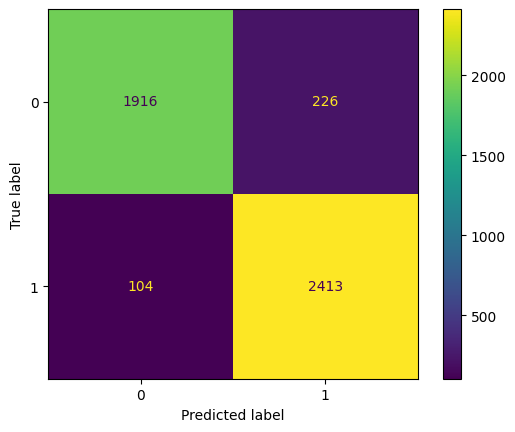

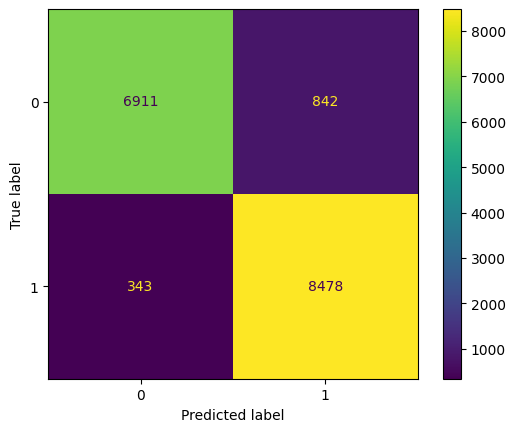

In [ ]:
y_pred_func_imp = best_model_func_imp.predict(X_test)
y_pred_func_imp = (y_pred_func_imp > 0.5).astype(int) 
accuracy_func_imp = accuracy_score(y_test, y_pred_func_imp)
accuracy_train_func_imp = accuracy_score(y_train, y_train_pred_func_imp)

print(f"Best Parameters: {best_params_func_imp}")
print(f"Test Accuracy: {accuracy_func_imp}")
print(f"Train Accuracy: {accuracy_train_func_imp}")

y_train_pred_func_imp = best_model_func_imp.predict(X_train)
y_train_pred_func_imp = (y_train_pred_func_imp > 0.5).astype(int) 

cm_test_func_imp = confusion_matrix(y_test,y_pred_func_imp)
ConfusionMatrixDisplay(cm_test_func_imp).plot()
print(classification_report(y_test, y_pred_func_imp))

cm_train_func_imp = confusion_matrix(y_train,y_train_pred_func_imp)
ConfusionMatrixDisplay(cm_train_func_imp).plot()
print(classification_report(y_train, y_train_pred_func_imp))

## v.5 Best Model

Model Definition

In [ ]:
input_layer = Input(shape=X_train.shape[1])
hidden_layer_1 = Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional_2 = Model (inputs=input_layer, outputs=output_layer)

# Compile
model_functional_2.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional_2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           1056        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 8)            264         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 40)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

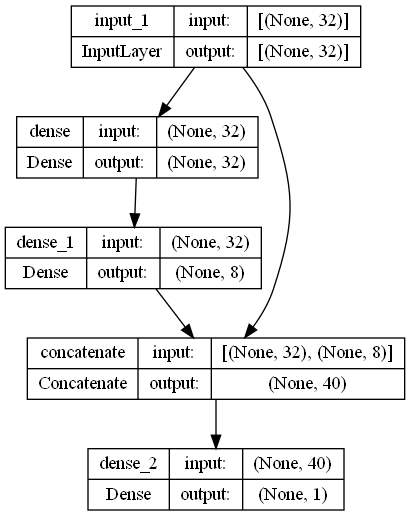

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_functional_2, show_shapes=True)

Model Training

In [ ]:
history_func_2 = model_functional_2.fit(train_pipe,
                                    epochs=32,
                                    validation_data=val_pipe,
                                    batch_size=10)

Epoch 1/32


1036/1036 [==============================] - 8s 7ms/step - loss: 0.3376 - accuracy: 0.8340 - val_loss: 0.2488 - val_accuracy: 0.8890
Epoch 2/32
1036/1036 [==============================] - 8s 8ms/step - loss: 0.2532 - accuracy: 0.8894 - val_loss: 0.2479 - val_accuracy: 0.8803
Epoch 3/32
1036/1036 [==============================] - 7s 7ms/step - loss: 0.2468 - accuracy: 0.9007 - val_loss: 0.2399 - val_accuracy: 0.8961
Epoch 4/32
1036/1036 [==============================] - 8s 7ms/step - loss: 0.2375 - accuracy: 0.9112 - val_loss: 0.2267 - val_accuracy: 0.9173
Epoch 5/32
1036/1036 [==============================] - 7s 7ms/step - loss: 0.2195 - accuracy: 0.9211 - val_loss: 0.2046 - val_accuracy: 0.9227
Epoch 6/32
1036/1036 [==============================] - 7s 7ms/step - loss: 0.1974 - accuracy: 0.9261 - val_loss: 0.1854 - val_accuracy: 0.9238
Epoch 7/32
1036/1036 [==============================] - 7s 7ms/step - loss: 0.1822 - accuracy: 0.9289 - val_loss: 0.1766 - val_accuracy: 0.9222
Epo

Model Evaluation

In [ ]:
history_func_2_df = pd.DataFrame(history_func_2.history)
history_func_2_df

,loss,accuracy,val_loss,val_accuracy
0,0.337567,0.833957,0.248783,0.889010
1,0.253169,0.889405,0.247896,0.880305
2,0.246800,0.900688,0.239892,0.896083
3,0.237471,0.911247,0.226728,0.917301
4,0.219546,0.921111,0.204605,0.922742
5,0.197414,0.926149,0.185354,0.923830
6,0.182160,0.928895,0.176633,0.922198
7,0.174516,0.930041,0.171907,0.927095
8,0.170521,0.928593,0.172476,0.927639
9,0.167417,0.930131,0.173215,0.921110


Confusion Matrix

 33/146 [=====>........................] - ETA: 0s

146/146 [==============================] - 1s 5ms/step
Functional Test Accuracy: 0.9278815196394076
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2142
           1       0.95      0.92      0.93      2517

    accuracy                           0.93      4659
   macro avg       0.93      0.93      0.93      4659
weighted avg       0.93      0.93      0.93      4659



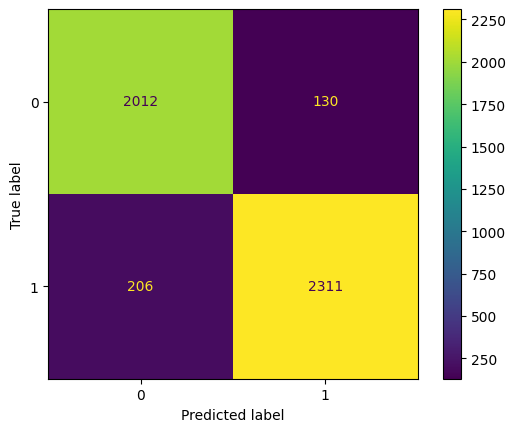

In [ ]:
y_pred_func_2 = model_functional_2.predict(X_test)

y_pred_func_2 = np.where(y_pred_func_2 >= 0.5, 1, 0)

accuracy_func_2 = accuracy_score(y_test, y_pred_func_2)
print(f"Functional Test Accuracy: {accuracy_func_2}")

cm_test_func_2 = confusion_matrix(y_test,y_pred_func_2)
ConfusionMatrixDisplay(cm_test_func_2).plot()
print(classification_report(y_test, y_pred_func_2))

# vi. Model Saving
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. Pilihlah 1 arsitektur ANN yang terbaik berdasarkan hasil evaluasi sebelumnya.

In [ ]:
Nama_model = ['Model Sequential Baseline', 'Model Sequential Improvement', 'Model Functional Baseline', 'Model Functional Improvement', 'Best Model']
Akurasi_Model = [accuracy_seq, accuracy_seq_imp, accuracy_func, accuracy_func_imp, accuracy_func_2]

data_tabel = list(zip(Nama_model, Akurasi_Model))
table_headers = ['Model', 'Accuracy']

print (tabulate(data_tabel, headers=table_headers, tablefmt='grid'))

NameError: name 'accuracy_seq' is not defined

Berdasarkan diatas, akurasi yang terbaik adalah dari model functional yang sudah dilakukan improvement, sehingga akan disimpan untuk digunakan pada model inference

In [ ]:
joblib.dump(final_pipeline, "final_pipeline.pkl")

joblib.dump(grid_search_func_imp, "best_model.h5")


INFO:tensorflow:Assets written to: C:\Users\farha\AppData\Local\Temp\tmp04796yep\assets


['best_model.h5']

# vii. Model Inference
>  Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set, val-set, ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.



In [ ]:
pipe = joblib.load('final_pipeline.pkl')
ann = load_model('best_model.hf')

In [ ]:
data_inf = {
    'user_id': 'hacktiv8', 
    'age': 30, 
    'gender': 'M', 
    'region_category': 'City', 
    'membership_category': 'Premium Membership',
    'joining_date': '2016-08-20', 
    'joined_through_referral': 'No', 
    'preferred_offer_types': 'Without Offers',
    'medium_of_operation': 'Both', 
    'internet_option': 'Fiber_Optic', 
    'last_visit_time': '15:09:13',
    'days_since_last_login': 13, 
    'avg_time_spent': 136, 
    'avg_transaction_value': 2008,
    'avg_frequency_login_days': 20, 
    'points_in_wallet': 159, 
    'used_special_discount': 'Yes',
    'offer_application_preference': 'No', 
    'past_complaint': 'No', 
    'complaint_status': 'Not Applicable',
    'feedback': 'Too many ads'
}

data_inf = pd.DataFrame([data_inf])
data_inf

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,hacktiv8,30,M,City,Premium Membership,2016-08-20,No,Without Offers,Both,Fiber_Optic,...,13,136,2008,20,159,Yes,No,No,Not Applicable,Too many ads


In [ ]:
data_inf_transform = pipe.transform(data_inf)
y_pred_inf = ann.predict(data_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

1/1 [==============================] - 0s 45ms/step


array([[0]])

# viii. Pengambilan Kesimpulan
> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Berdasarkan hasil pengerjaan, dapat disimpulkan bahwa:

1. Dari EDA, terlihat bahwa dataset ini didominasi oleh yang churn sebesar 54.1% yang dimana tidak terlihat adanya spesifik pada umur berapa melakukan churn, lebih banyak bergender female dibandingkan male, banyak berada pada region town. Data churn tidak memiliki kategori membership premium dan platinum, sehingga memang tidak tertarik untuk menggunakan membership yang lebih tinggi, tidak berpengaruh juga dari kapan bergabungnya. Pada media yang digunakan tidak adanya pengaruh yang mana lebih mendominasi untuk churn dan tidak, sama halnya pada jenis internet yang digunakan. Berdasarkan distribusi waktu penggunaan, tidak ada juga korelasi dengan yang melakukan churn atau tidak, untuk rata-rata transaksi yang digunakan juga tidak adanya hubungan. Sama dengan yang sebelumnya, rata-rata frekuensi login dan jumlah poin di wallet tidak berpengaruh.
    
2. Berdasarkan Model Evaluation, dari beberapa model yang ada yang paling bagus adalah model functional improvement, model baseline tersebut sudah bagus dalam menangani dataset, saat dilakukan hyperparameter tuning dengan beberapa parameter yang digunakan, hanya meningkat sejumlah 0.0011. Dataset ini tergolong goodfit karena nilai akurasi pada data train dan data test tinggi dan juga gapnya yang kecil. Model tersebut dapat memprediksi yang churn dan tidak churn dengan baik.

    True Positive yang berarti memprediksi churn dan aktualnya churn memiliki nilai yang cukup tinggi, artinya pada dataset ini banyak yang churn, sedangkan False Negative yang berarti tidak churn dan aktualnya tidak churn.


3. Untuk mengimprovenya dapat digunakan parameter-parameter lainnya dan mungkin mengatur jumlah hidden layer dan juga densenya.